# Optical character recognition (OCR)

In [84]:
# !pip install easyocr

In [85]:
import cv2
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import imutils
import easyocr

import os 
# os.chdir(r"C:\Users\amb\Downloads")

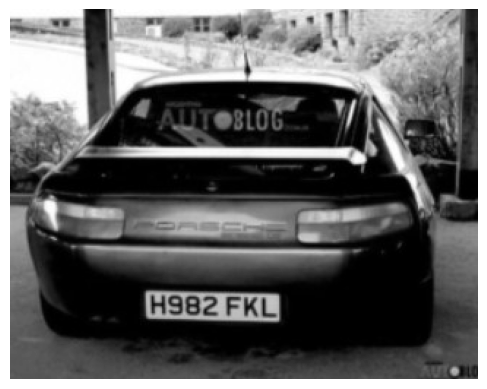

In [86]:
import cv2
import matplotlib.pyplot as plt

# Read the image
img = cv2.imread("1.jpg")

# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Display the grayscale image using matplotlib
plt.imshow(gray, cmap='gray')  # Specify 'gray' colormap for proper display
plt.axis('off')  # Optional: turn off the axis
plt.show()


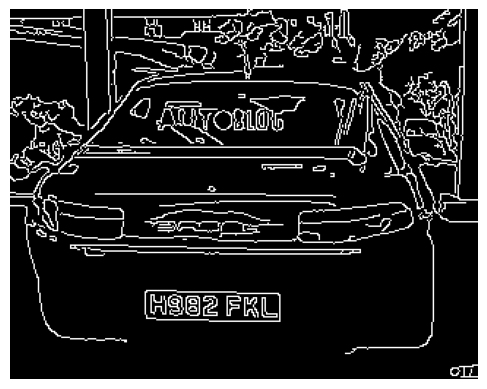

In [87]:

# Apply noise reduction using a bilateral filter
bfilter = cv2.bilateralFilter(gray, 11, 17, 17)

# Perform edge detection
edged = cv2.Canny(bfilter, 50, 200)

# Display the edge-detected image
plt.imshow(edged, cmap='gray')  # Use 'gray' colormap for proper visualization
plt.axis('off')  # Hide axes
plt.show()

In [88]:
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contourss = imutils.grab_contours(keypoints)
contours = sorted(contourss, key=cv2.contourArea, reverse=True)[:10]
#print(contours)
len(contours)

10

In [89]:
location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True)
    if len(approx) == 4:
        location = approx
        break
len(location)        

4

In [90]:
location


array([[[ 92, 193]],

       [[ 93, 211]],

       [[184, 213]],

       [[183, 194]]], dtype=int32)

In [91]:
approx[1][0][0]

93

In [92]:
mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [location], -1,255, -1)
new_image = cv2.bitwise_and(img, img, mask=mask)

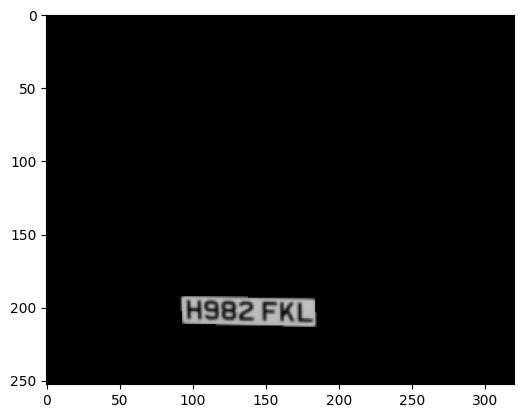

In [93]:
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))


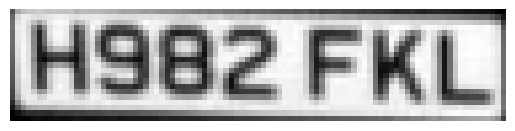

In [94]:
(x, y) = np.where(mask == 255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))

# Cropping the grayscale image
cropped_image = gray[x1:x2+1, y1:y2+1]

# Display the grayscale cropped image
plt.imshow(cropped_image, cmap='gray')  # Use 'gray' colormap
plt.axis('off')  # Optional: Hide axes
plt.show()


In [95]:
# plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))


In [96]:
reader = easyocr.Reader(['en'])
result = reader.readtext(cropped_image)
result

[([[0, 0], [93, 0], [93, 21], [0, 21]], 'H9B2FKL', 0.35659512534956067)]

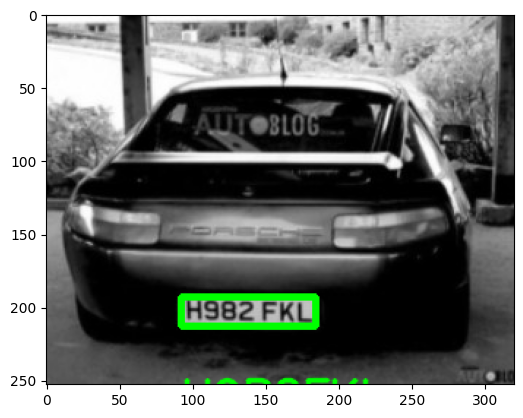

In [97]:
text = result[0][-2]
font = cv2.FONT_HERSHEY_SIMPLEX
res = cv2.putText(img, text=text, org=(approx[0][0][0], approx[1][0][1]+60), fontFace=font, fontScale=1, color=(0,255,0), thickness=2, lineType=cv2.LINE_AA)
res = cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]), (0,255,0),3)
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))

In [98]:
print(text)

H9B2FKL


In [99]:
# !pip install pytesseract 